In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Data Processing

In [3]:
df = pd.read_csv('D:\\Zalo_test\\Part3\\data_part3.csv', delimiter=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TRAN_ID          9995 non-null   int64  
 1   USER_ID          9995 non-null   int64  
 2   CITY             9872 non-null   object 
 3   AGENT            9995 non-null   object 
 4   STATUS           9995 non-null   object 
 5   SHOP_ID          9995 non-null   int64  
 6   TIME_TO_CONVERT  9077 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 546.7+ KB


In [5]:
df['CITY'].value_counts(dropna=False)

HCM       4302
Others    2870
Ha Noi    2700
NaN        123
Name: CITY, dtype: int64

In [6]:
df['CITY'] = df['CITY'].fillna('Others')

In [7]:
filtered_df = df.loc[df['TIME_TO_CONVERT'].notnull()]

### Data Exploration

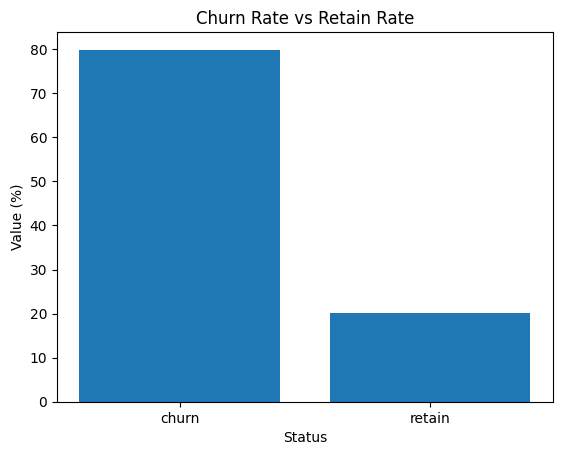

In [8]:
rate = filtered_df['STATUS'].value_counts(normalize=True).reset_index()
rate['STATUS'] = round(rate['STATUS']*100, 2)

plt.bar(rate['index'], rate['STATUS'])
plt.xlabel('Status')
plt.ylabel('Value (%)')
plt.title('Churn Rate vs Retain Rate')
plt.show()

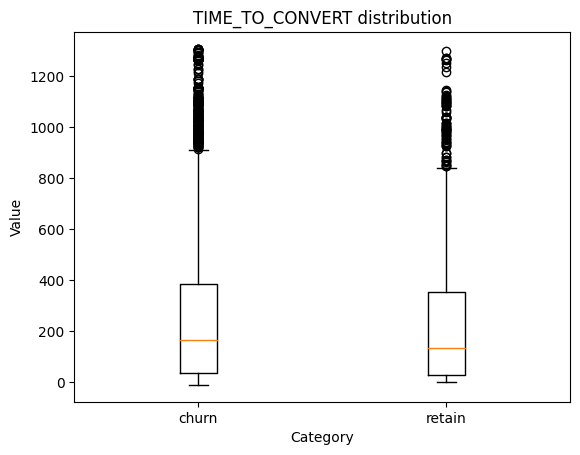

In [9]:
grouped_data = filtered_df.groupby('STATUS')['TIME_TO_CONVERT'].apply(list)

plt.boxplot(grouped_data.values)
plt.xticks(range(1, len(grouped_data) + 1), grouped_data.index)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('TIME_TO_CONVERT distribution')
plt.show()

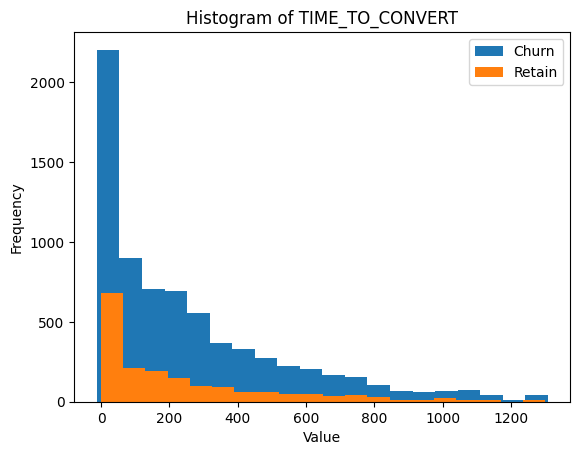

In [10]:
plt.hist(filtered_df.loc[filtered_df['STATUS'] == 'churn', 'TIME_TO_CONVERT'], bins=20, label='Churn')
plt.hist(filtered_df.loc[filtered_df['STATUS'] == 'retain', 'TIME_TO_CONVERT'], bins=20, label='Retain')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TIME_TO_CONVERT')
plt.legend()
plt.show()

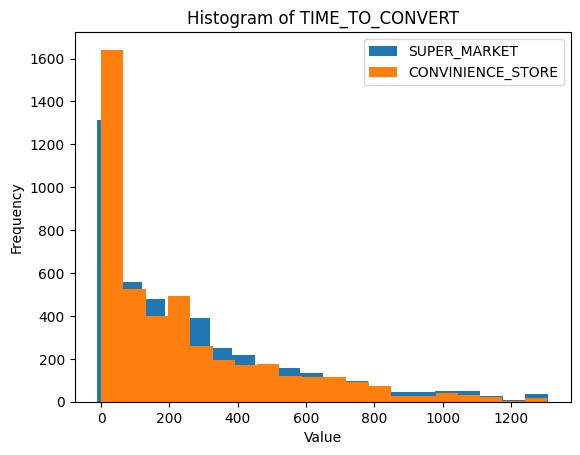

In [16]:
plt.hist(filtered_df.loc[filtered_df['AGENT'] == 'SUPER_MARKET', 'TIME_TO_CONVERT'], bins=20, label='SUPER_MARKET')
plt.hist(filtered_df.loc[filtered_df['AGENT'] == 'CONVINIENCE_STORE', 'TIME_TO_CONVERT'], bins=20, label='CONVINIENCE_STORE')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TIME_TO_CONVERT')
plt.legend()
plt.show()

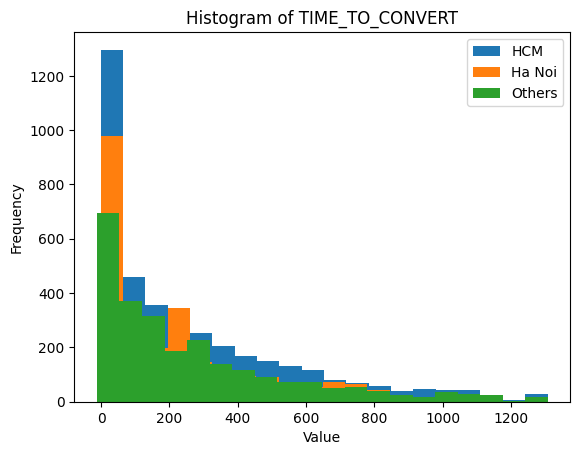

In [18]:
plt.hist(filtered_df.loc[filtered_df['CITY'] == 'HCM', 'TIME_TO_CONVERT'], bins=20, label='HCM')
plt.hist(filtered_df.loc[filtered_df['CITY'] == 'Ha Noi', 'TIME_TO_CONVERT'], bins=20, label='Ha Noi')
plt.hist(filtered_df.loc[filtered_df['CITY'] == 'Others', 'TIME_TO_CONVERT'], bins=20, label='Others')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TIME_TO_CONVERT')
plt.legend()
plt.show()

##### Số ngày chuyển đổi từ first online payment to first ofline payment tập trung nhiều trong khoảng từ 0 đến 60 ngày kể cả nhóm user churn hay retain. Điều này cho thấy được rằng khách hàng có xu hướng khá hài lòng với zalopay chính vì vậy họ đã sử dụng zalopay cho các thanh toán offline ngay sau khi họ thực hiện thanh toán online

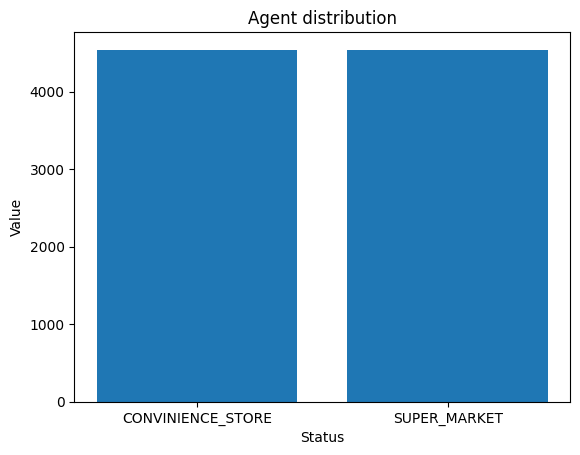

In [23]:
rate = filtered_df['AGENT'].value_counts().reset_index()

plt.bar(rate['index'], rate['AGENT'])
plt.xlabel('Status')
plt.ylabel('Value')
plt.title('Agent distribution')
plt.show()

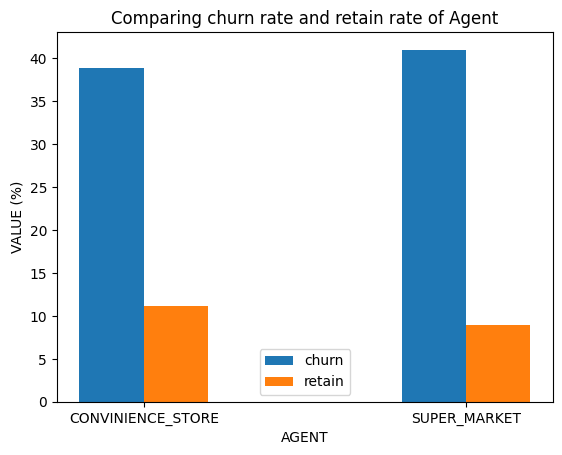

In [52]:
agent = filtered_df[['AGENT', 'STATUS']].value_counts(normalize=True).reset_index().rename(columns={0: 'VALUE'})
agent['VALUE'] = round(agent['VALUE']*100, 2)
agent = agent.sort_values('AGENT')

groups = agent['AGENT'].unique()
statuses = agent['STATUS'].unique()

bar_width = 0.2
index = np.arange(len(groups))

fig, ax = plt.subplots()

for i, status in enumerate(statuses):
    values = agent[agent['STATUS'] == status]['VALUE']
    ax.bar(index + i * bar_width, values, bar_width, label=status)

ax.set_xlabel('AGENT')
ax.set_ylabel('VALUE (%)')
ax.set_title('Comparing churn rate and retain rate of Agent')
ax.set_xticks(index + (bar_width * (len(statuses) - 1)) / 2)
ax.set_xticklabels(groups)
ax.legend()

plt.show()

In [11]:
filtered_df[['CITY', 'AGENT']].value_counts()

CITY    AGENT            
HCM     CONVINIENCE_STORE    2044
Others  SUPER_MARKET         1945
HCM     SUPER_MARKET         1876
Ha Noi  CONVINIENCE_STORE    1857
        SUPER_MARKET          714
Others  CONVINIENCE_STORE     641
dtype: int64

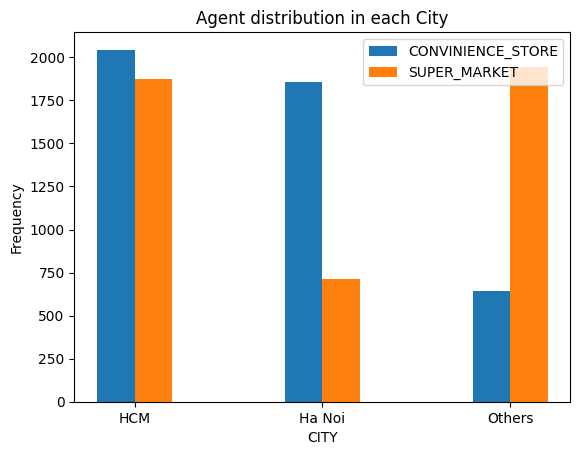

In [57]:
city = filtered_df[['CITY', 'AGENT']].value_counts().reset_index().rename(columns={0: 'VALUE'})
city = city.sort_values('CITY')

groups = city['CITY'].unique()
agent = city['AGENT'].unique()

bar_width = 0.2
index = np.arange(len(groups))

fig, ax = plt.subplots()

for i, status in enumerate(agent):
    values = city[city['AGENT'] == status]['VALUE']
    ax.bar(index + i * bar_width, values, bar_width, label=status)

ax.set_xlabel('CITY')
ax.set_ylabel('Frequency')
ax.set_title('Agent distribution in each City')
ax.set_xticks(index + (bar_width * (len(agent) - 1)) / 2)
ax.set_xticklabels(groups)
ax.legend()

plt.show()

###### Khách hàng tại HCM và HN thường thực hiện giao dịch tại các cửa hàng tiện lợi. Điều này cũng dễ hiểu, vì tại 2 TP lớn này xuất hiện nhiều cửa hàng tiện lợi và loại cừa hàng này có thể đáp ứng những nhu cầu nhanh chóng của khách hàng
###### Trong khi đó, các tỉnh và thành phố khác ưa chuộng siêu thị hơn. Phần lớn các tỉnh khác có rất ít cửa hàng tiện lợi hoặc thậm chí là không có, chính vì vậy số lượng giao dịch tại siêu thị luôn nhiều hơn.

In [13]:
filtered_df[['CITY', 'STATUS']].value_counts()

CITY    STATUS
HCM     churn     2875
Ha Noi  churn     2213
Others  churn     2163
HCM     retain    1045
Others  retain     423
Ha Noi  retain     358
dtype: int64

In [12]:
filtered_df[['CITY', 'AGENT', 'STATUS']].value_counts()

CITY    AGENT              STATUS
Others  SUPER_MARKET       churn     1691
Ha Noi  CONVINIENCE_STORE  churn     1602
HCM     CONVINIENCE_STORE  churn     1454
        SUPER_MARKET       churn     1421
Ha Noi  SUPER_MARKET       churn      611
HCM     CONVINIENCE_STORE  retain     590
Others  CONVINIENCE_STORE  churn      472
HCM     SUPER_MARKET       retain     455
Ha Noi  CONVINIENCE_STORE  retain     255
Others  SUPER_MARKET       retain     254
        CONVINIENCE_STORE  retain     169
Ha Noi  SUPER_MARKET       retain     103
dtype: int64

In [20]:
filtered_df['AGENT'].value_counts()

CONVINIENCE_STORE    4542
SUPER_MARKET         4535
Name: AGENT, dtype: int64